In [9]:
%load_ext autoreload
%autoreload 2

import GCRCatalogs
import matplotlib.pyplot as plt
import pickle
import sys
import glob
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import sys
import photoz_utils as utils
from astropy.table import Table
def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
    from clmm.dataops import compute_galaxy_weights
from clmm import Cosmology
from scipy.integrate import simps
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit

In [11]:
file = glob.glob('/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters/test_*')

In [12]:
f=edit.load_pickle(file[0])

In [14]:
pzbins = f.galcat['photoz_zbins_bpz']
pdf = np.array(f.galcat['photoz_pdf_bpz'])

In [32]:
z_array = pzbins[0]
pdf_test = pdf[104]

In [33]:
cdf = utils.cdf_from_pdf(pdf_test, z_array)
cdf_1 = utils.inverse_cdf_fct(cdf, z_array)

In [34]:
z_sample = utils.draw_z_from_inverse_cdf(cdf_1, 2000)

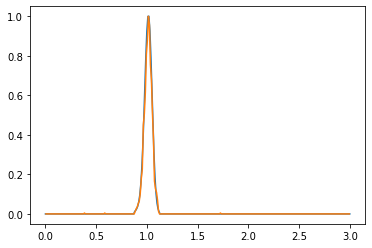

In [35]:
plt.plot(z_array, pdf_test/max(pdf_test))
hist, bin_edges = np.histogram(z_sample, bins=z_array,density=True)
bin=[(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]
plt.plot(bin, hist/max(hist))

In [36]:
data = utils.compute_photoz_quantities(f.z, f.galcat['photoz_pdf_bpz'], f.galcat['photoz_zbins_bpz'],
                                       n_samples_per_pdf=3, cosmo=cosmo, use_clmm=False)

/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/data_extraction/photoz_utils.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  return simps(sigmacrit_1_integrand, pzbins[0,:], axis=1)**(-1.)


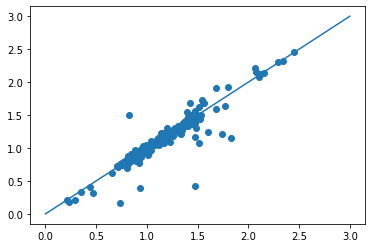

In [39]:
x = np.linspace(0, 3, 10)
plt.scatter(np.array(f.galcat['photoz_mean_bpz']), data['z_estimate_2'])
#plt.scatter(np.array(f.galcat['photoz_mean_bpz']), z_sample_bpz)
plt.plot(x,x)

[]

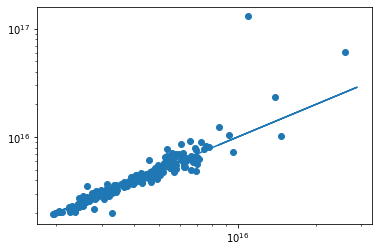

In [42]:
plt.scatter( data['sigma_c_photoz'], data['sigma_c_photoz_estimate_1'])
#plt.scatter(np.array(f.galcat['photoz_mean_bpz']), z_sample_bpz)
plt.plot( data['sigma_c_photoz'], data['sigma_c_photoz'])
plt.loglog()